# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>


![](https://cdn3.f-cdn.com//files/download/146138312/flights.jpg?fit=crop)

<h3 style="color:#0099e6;font-size:35px;font-family:Georgia;text-align:center;"><strong><strong style="color:#fd1c20;font-size:35px;font-family:Georgia;">About <strong style="color:#00e617;font-size:35px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:35px;font-family:Georgia;">Dataset </strong></strong></strong></strong></h3>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>1.Airline:-</b> Name of the airline used for traveling.<br>
<b>2.Date_of_Journey:-</b> Date at which a person traveled.<br>
<b>3.Source:-</b> Starting location of flight.<br>
<b>4.Destination:-</b> Ending location of flight.<br>
<b>5.Route:-</b> This contains information on starting and ending location of the journey in the standard format used by airlines.<br>
<b>6.Dep_Time:-</b> Departure time of flight from starting location.<br>
<b>7.Arrival_Time:-</b> Arrival time of flight at destination.<br>
<b>8.Duration:-</b> Duration of flight in hours/minutes.<br>
<b>9.Total_Stops:-</b> Number of total stops flight took before landing at the destination.<br>
<b>10.Additional_Info:-</b> Shown any additional information about a flight.<br>
<b>11.Price:-</b> Price of the flight.<br>
    <br>
</p>

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# data modeling 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import joblib

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


# <b>3 <span style='color:#0000FF'>|</span> Reading the dataset</b>

In [2]:
def read_data(path) :
    df = pd.read_excel(path,parse_dates=True)
    return df

In [3]:
train_df= read_data(r'../input/plane-ticket-price/Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
Number of variables = 11<br>
Number of rows = 10683<br>
Number of categorical type of feature = 10<br>
Number of numerical type of feature = 1<br>
<br></p>

In [5]:
train_df.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Price,10683.000000,9087.064121,4611.359167,1759.000000,5277.000000,8372.000000,12373.000000,79512.000000


In [6]:
train_df.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [7]:
#datasist.structdata.describe(df)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_df.duplicated().sum()

220

#### There is 220 dublicated values , I will drop them before start 

In [10]:
train_df.drop_duplicates(inplace=True)

In [11]:
train_df.shape

(10463, 11)

# <b> <span style='color:#0000FF'></span> Data Wrangling</b>


In [12]:
def convert_time(df,col_name):
    
    ## convert duration to minutes
    h = df[col_name].str.extract('(\d+)h', expand=False).astype(float) * 60
    m = df[col_name].str.extract('(\d+)m', expand=False).astype(float)
    df[col_name] = h.add(m, fill_value=0).astype(int).astype(str) + 'm'
    
    ## convert to integer
    df[col_name]=df[col_name].apply(lambda x: int(x.split('m')[0]))
    
    
    

In [13]:
def split(x):
    x=float(x.split(':')[0])
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [14]:
def process_data(df):
    ### extract day_name and month from date_of_journey column 
    df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey)
    df['Month']=df['Date_of_Journey'].dt.month
    df['Day']=df['Date_of_Journey'].dt.day_name()

    ### convert Duration column to numerical value in minutes
    convert_time(df,'Duration')

    ### convert Dep_time and Arrival_time to Part of day such as (evening, noon , morning ...)
    df['Dep_Time']=df['Dep_Time'].apply(split)
    df['Arrival_Time']=df['Arrival_Time'].apply(split)
    
    ### drop non benefit columns
    df.drop(columns=['Date_of_Journey','Route'],axis=1,inplace=True)
    
    ### Reindex the dataframe columns
    df=df.reindex(columns=['Airline', 'Source', 'Destination','Month', 'Day','Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'])
    
    return df

In [15]:
train_df=process_data(train_df)
train_df.head()

,Airline,Source,Destination,Month,Day,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,3,Sunday,Night,Late Night,170,non-stop,No info,3897
1,Air India,Kolkata,Banglore,1,Saturday,Early Morning,Noon,445,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,9,Friday,Morning,Late Night,1140,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,12,Thursday,Evening,Night,325,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,1,Thursday,Noon,Night,285,1 stop,No info,13302


In [16]:
train_df=train_df.dropna()

In [17]:
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Month              0
Day                0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# <b>4<span style='color:#0000FF'>|</span> Pandas Profiling </b>

### <span style="color: blue;">Generates profile reports from a pandas DataFrame.</span>
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [18]:
profile=ProfileReport(train_df, minimal=True,explorative=True)
profile.to_file('Airlines Price Prediction.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile

# <b>5 <span style='color:#0000FF'>|</span> Exploratory Data Analysis</b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Target Feature [Price] </b></p>
</div>. 

In [20]:
train_df[['Price']].describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


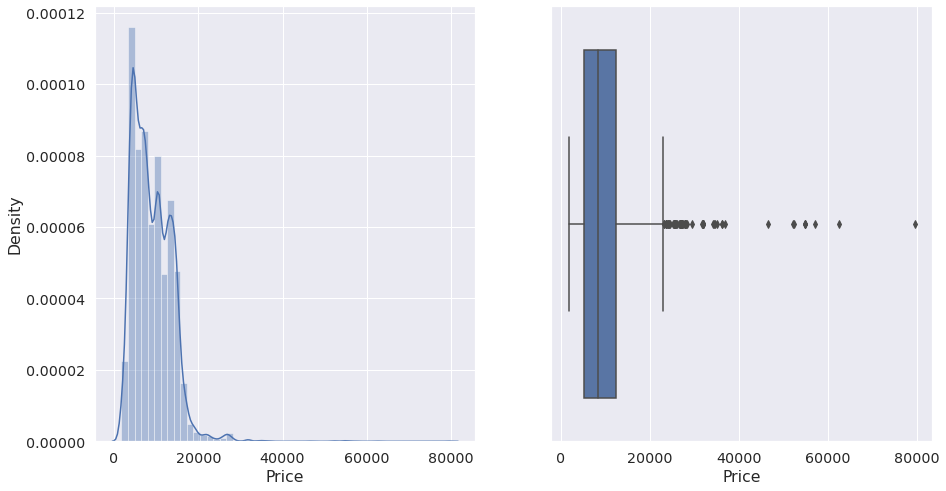

In [21]:
fig , ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Price'],ax=ax[0])
sns.boxplot(data=train_df,x='Price',ax=ax[1])
plt.show()

In [22]:
top_highest_price = train_df.sort_values("Price", ascending = False).reset_index().head(20)
top_highest_price

,index,Airline,Source,Destination,Month,Day,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2924,Jet Airways Business,Banglore,New Delhi,1,Thursday,Early Morning,Morning,340,1 stop,Business class,79512
1,5372,Jet Airways Business,Banglore,New Delhi,1,Thursday,Early Morning,Morning,400,1 stop,Business class,62427
2,10364,Jet Airways Business,Banglore,New Delhi,1,Thursday,Morning,Noon,280,1 stop,Business class,57209
3,5439,Jet Airways,Banglore,New Delhi,1,Thursday,Noon,Night,365,1 stop,No info,54826
4,1478,Jet Airways,Banglore,New Delhi,3,Monday,Evening,Late Night,365,1 stop,No info,54826
5,2618,Jet Airways,Banglore,New Delhi,3,Monday,Night,Early Morning,375,1 stop,No info,54826
6,9715,Jet Airways Business,Delhi,Cochin,6,Monday,Evening,Late Night,500,2 stops,No info,52285
7,657,Jet Airways Business,Banglore,New Delhi,1,Thursday,Early Morning,Morning,300,1 stop,No info,52229
8,7351,Jet Airways Business,Delhi,Cochin,3,Sunday,Evening,Late Night,500,2 stops,No info,46490
9,396,Multiple carriers,Delhi,Cochin,1,Thursday,Morning,Evening,385,1 stop,No info,36983


In [23]:
top_lowest_price = train_df.sort_values("Price", ascending = True).reset_index().head(20)
top_lowest_price

,index,Airline,Source,Destination,Month,Day,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4839,SpiceJet,Mumbai,Hyderabad,3,Monday,Night,Late Night,90,non-stop,No info,1759
1,4274,SpiceJet,Mumbai,Hyderabad,3,Wednesday,Night,Late Night,85,non-stop,No info,1759
2,10513,SpiceJet,Mumbai,Hyderabad,3,Wednesday,Early Morning,Early Morning,80,non-stop,No info,1759
3,4066,SpiceJet,Mumbai,Hyderabad,3,Thursday,Night,Late Night,85,non-stop,No info,1759
4,1513,Jet Airways,Mumbai,Hyderabad,3,Wednesday,Late Night,Late Night,90,non-stop,In-flight meal not included,1840
5,8223,SpiceJet,Mumbai,Hyderabad,12,Thursday,Night,Late Night,90,non-stop,No check-in baggage included,1965
6,2102,SpiceJet,Mumbai,Hyderabad,6,Thursday,Noon,Noon,90,non-stop,No check-in baggage included,1965
7,2724,SpiceJet,Mumbai,Hyderabad,5,Tuesday,Night,Late Night,90,non-stop,No check-in baggage included,1965
8,655,SpiceJet,Mumbai,Hyderabad,3,Tuesday,Noon,Noon,90,non-stop,No check-in baggage included,1965
9,10433,SpiceJet,Mumbai,Hyderabad,5,Saturday,Early Morning,Early Morning,90,non-stop,No check-in baggage included,1965


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Numerical Features </b></p>
</div>. 

- **Duration**

In [24]:
train_df[['Duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10462.0,629.781591,500.699045,5.0,170.0,505.0,910.0,2860.0


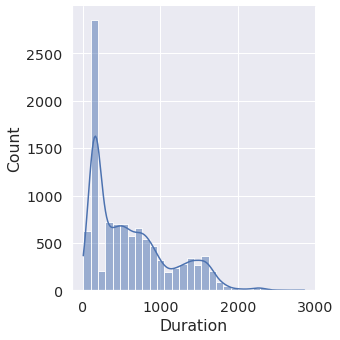

In [25]:
sns.displot(train_df.Duration,bins=30,kde=True)

#### The distribution of Duration seems somewhat unnormal, but there seems to be a <span style="color:blue;">**right skew**</span>.


<AxesSubplot:xlabel='Duration'>

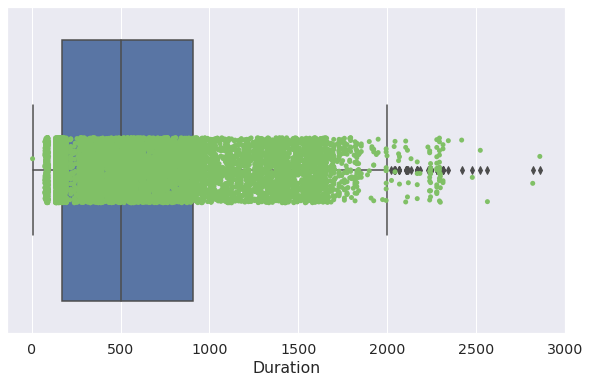

In [26]:
sns.boxplot(train_df.Duration)
sns.stripplot(train_df.Duration,palette='summer')

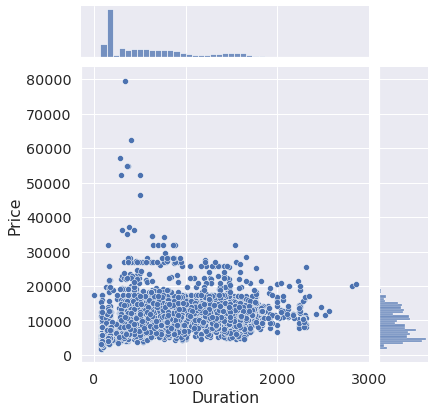

In [27]:
sns.jointplot(data=train_df,x='Duration',y='Price',kind='scatter',palette='vridis')

Text(0.5, 1.0, 'Average prices depending on the duration')

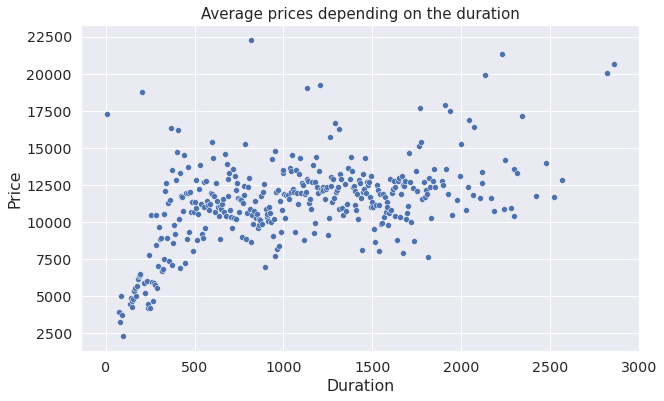

In [28]:
### Average prices depending on the duration
Duration_df=train_df.groupby(['Duration'])['Price'].mean().reset_index()
sns.scatterplot(data=Duration_df,x='Duration',y='Price').set_title("Average prices depending on the duration",fontsize=15)

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;"> <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;"> </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.
However some outliers seem to affect the regression curve </b><br>
    <br></p>

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Correlation Matrix   </b></p>
</div>

In [29]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(20,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='viridis',square=False,lw=2,annot=True,cbar=False,fmt='.1');plt.show() 

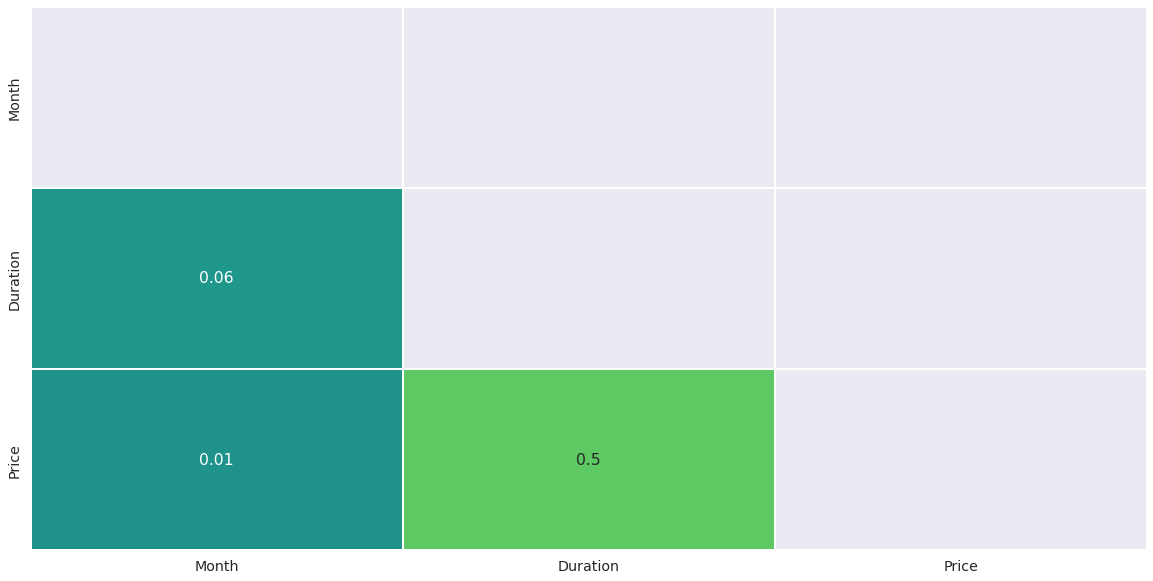

In [30]:
corrMat(train_df)

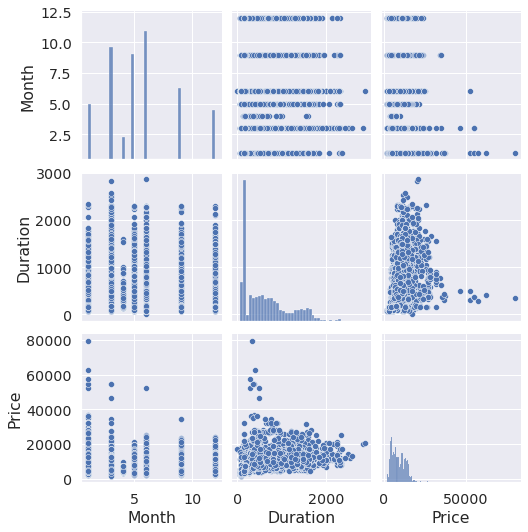

In [31]:
sns.pairplot(train_df)

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.3 | Categorical Features </b></p>
</div>. 

- **Airline**
-  **Source**
- **Destination**
- **Dep_Time**
- **Arrival_Time**
- **Total_Stops**
- **Additional_Info**
- **Month**
- **Day**

In [32]:
cat_cols=['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Additional_Info','Month', 'Day']

In [33]:
for col in cat_cols:
    print(f'--- {col}---')
    print(train_df[col].unique())
    print('_'*50)

--- Airline---
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
__________________________________________________
--- Source---
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
__________________________________________________
--- Destination---
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
__________________________________________________
--- Dep_Time---
['Night' 'Early Morning' 'Morning' 'Evening' 'Noon' 'Late Night']
__________________________________________________
--- Arrival_Time---
['Late Night' 'Noon' 'Night' 'Morning' 'Early Morning' 'Evening']
__________________________________________________
--- Total_Stops---
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
__________________________________________________
--- Additional_Info---
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 S

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Airline  </b></p>
</div>


In [34]:
train_df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
train_df.groupby('Airline')[['Price']].describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1694.0   9556.608028   3937.875634   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2043.0   5668.469897   2266.933697   
Jet Airways                        3700.0  11599.021081   4315.671402   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            815.0   4335.841718   1851.144678   
Trujet                                1.0   4140.000000           NaN   
Vistara                             478.0   7801.355649   2915.288625   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                         \
                                       min       25%      50%       75%   
Airline                                                                   
Air Asia                            3383.0   4282.00   5162.0   6451.00   
Air India                           2050.0   6597.75   9316.0  12199.00   
GoAir                               3398.0   3898.00   5135.0   6811.25   
IndiGo                              2227.0   4226.00   5000.0   6493.00   
Jet Airways                         1840.0   8586.00  11134.0  14151.00   
Jet Airways Business               46490.0  52243.00  54747.0  61122.50   
Multiple carriers                   5797.0   7723.00  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.00  11269.0  11269.00   
SpiceJet                            1759.0   3573.00   3873.0   4760.00   
Trujet                              4140.0   4140.00   4140.0   4140.00   
Vistara                             3687.0   5403.00   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.00   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

<AxesSubplot:>

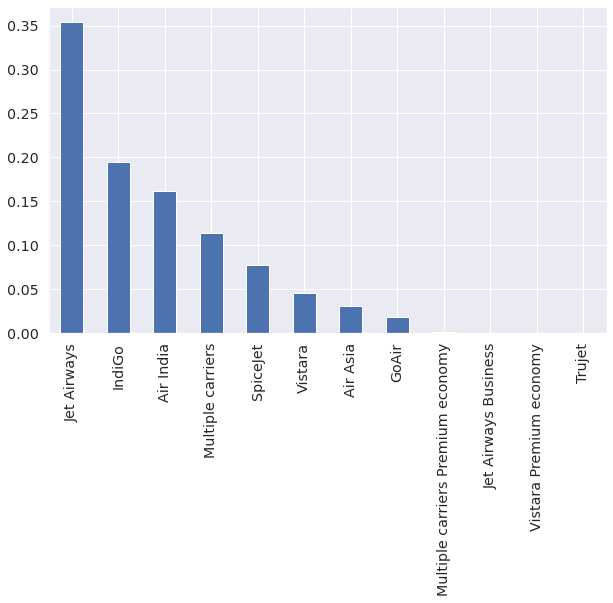

In [36]:
train_df.Airline.value_counts(normalize=True).plot(kind='bar')

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;"> <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;"> </strong></p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 5 airlines are <b>Jet airways,Indigo, AirIndia, Multiple Carriers, Spicejet.</b><br>
    <br></p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

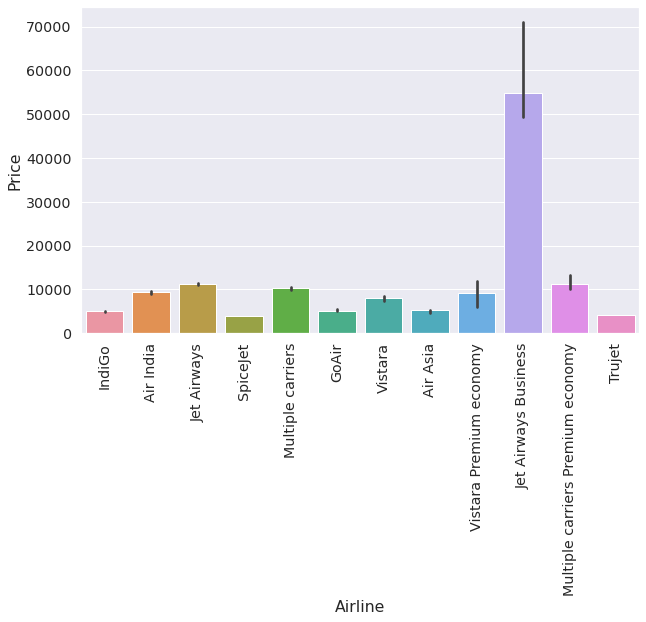

In [37]:
sns.barplot(data=train_df,x='Airline',y='Price',estimator=np.median)
plt.xticks(rotation=90)

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>There is a huge difference between economy and business class , business class avarage price is 58000 but all economy class have almost mean 10000.</b><br>
    <br></p>

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Source | Destination  </b></p>
</div>


Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:>

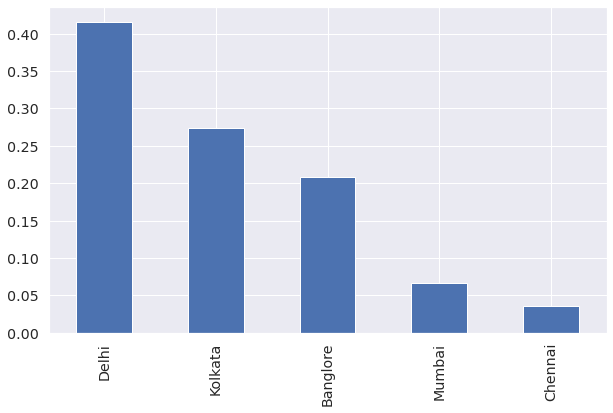

In [38]:
print(train_df.Source.value_counts())
train_df.Source.value_counts(normalize=True).plot(kind='bar')

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that, top 3 sources of the flights are <b>Delhi, Kolkata, Banglore.</b><br>
    <br></p>

<AxesSubplot:xlabel='Source'>

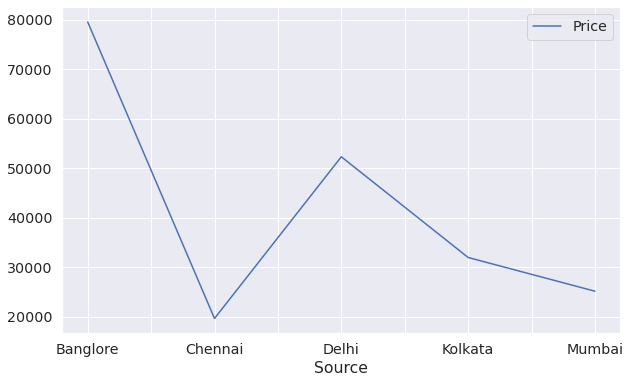

In [39]:
## avarge of price for source
train_df.groupby('Source')[['Price']].max().plot(kind='line')

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:>

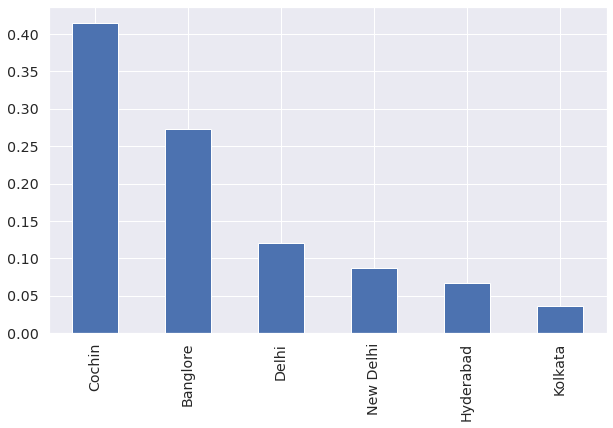

In [40]:
print(train_df.Destination.value_counts())
train_df.Destination.value_counts(normalize=True).plot(kind='bar')

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 3 destination of the flights are <b>Cochin, Banglore, Delhi.</b><br>
    <br></p>

<AxesSubplot:xlabel='Destination'>

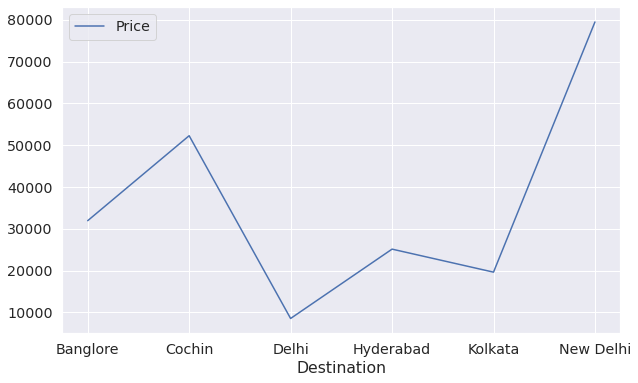

In [41]:
## avarage price per destination
train_df.groupby('Destination')[['Price']].max().plot(kind='line')

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Departure Time  </b></p>
</div>


Early Morning    2814
Evening          2323
Morning          2170
Noon             1696
Night             995
Late Night        464
Name: Dep_Time, dtype: int64


<AxesSubplot:>

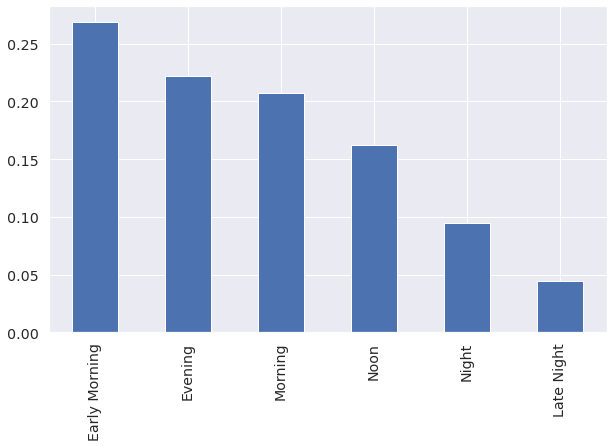

In [42]:
print(train_df.Dep_Time.value_counts())
train_df.Dep_Time.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Dep_Time'>

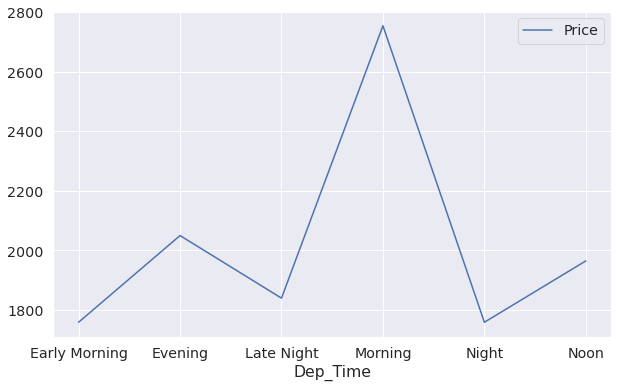

In [43]:
## avarage price per destination
train_df.groupby('Dep_Time')[['Price']].min().plot(kind='line')

In [44]:
train_df.groupby('Dep_Time')[['Price']].describe()

Price                                                    \
                count         mean          std     min     25%     50%   
Dep_Time                                                                  
Early Morning  2814.0  9027.153163  4733.407317  1759.0  5601.0  8016.0   
Evening        2323.0  9149.874731  4449.309120  2050.0  5571.0  8586.0   
Late Night      464.0  7712.568966  4461.357838  1840.0  4282.0  6016.5   
Morning        2170.0  9296.692166  4321.834705  2754.0  5758.5  8751.5   
Night           995.0  8198.713568  5168.029358  1759.0  4148.0  6297.0   
Noon           1696.0  9357.628538  4648.121950  1965.0  5753.0  8529.0   

                                  
                    75%      max  
Dep_Time                          
Early Morning  11883.00  79512.0  
Evening        12373.00  54826.0  
Late Night     10491.00  29528.0  
Morning        12384.00  57209.0  
Night          11302.00  54826.0  
Noon           13191.75  54826.0

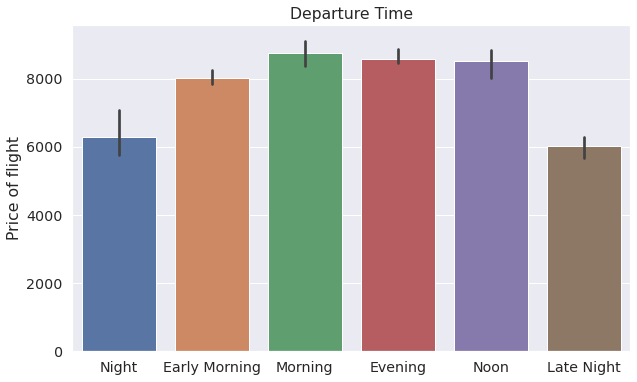

In [45]:
sns.barplot(data=train_df,x='Dep_Time',y='Price',estimator=np.median)
plt.title("Departure Time")
plt.ylabel("Price of flight")
plt.xlabel(None)
plt.show()


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>Low-price flight are tend to depart at Night, Late Night time, and Early Mornings - it makes sense, because it is quite inconvinient time.</b><br>
    <br></p>


   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Arrival Time  </b></p>
</div>


Evening          2631
Morning          2121
Night            1828
Late Night       1734
Noon             1149
Early Morning     999
Name: Arrival_Time, dtype: int64


<AxesSubplot:>

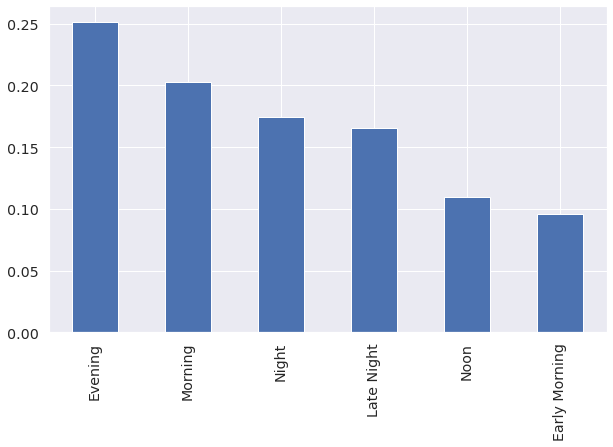

In [46]:
print(train_df.Arrival_Time.value_counts())
train_df.Arrival_Time.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Arrival_Time'>

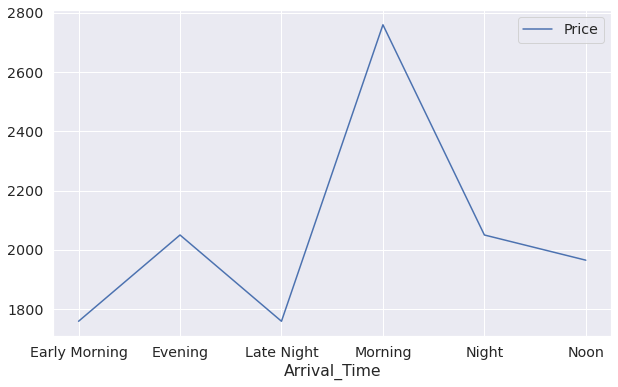

In [47]:
## avarage price per destination
train_df.groupby('Arrival_Time')[['Price']].min().plot(kind='line')

In [48]:
train_df.groupby('Arrival_Time')[['Price']].describe()

Price                                                      \
                count          mean          std     min     25%      50%   
Arrival_Time                                                                
Early Morning   999.0   8325.957958  4749.170637  1759.0  4423.0   7229.0   
Evening        2631.0  10119.762068  4109.434484  2050.0  7229.0  10262.0   
Late Night     1734.0   9317.480969  5092.168783  1759.0  4995.0   8283.0   
Morning        2121.0   8855.860443  4806.366604  2759.0  4995.0   8040.0   
Night          1828.0   8358.746171  4145.497610  2050.0  5583.0   7229.0   
Noon           1149.0   8073.084421  4742.269593  1965.0  4668.0   6600.0   

                                 
                   75%      max  
Arrival_Time                     
Early Morning  11537.5  54826.0  
Evening        12795.5  36983.0  
Late Night     13376.0  54826.0  
Morning        12080.0  79512.0  
Night          10844.0  54826.0  
Noon           10844.0  57209.0

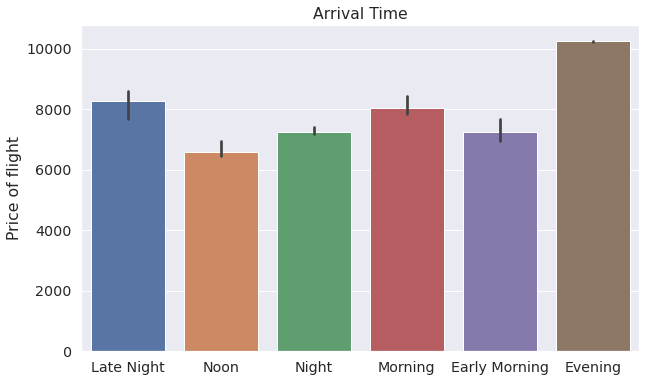

In [49]:
sns.barplot(data=train_df,x='Arrival_Time',y='Price',estimator=np.median)
plt.title("Arrival Time")
plt.ylabel("Price of flight")
plt.xlabel(None)
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>The most expensive flights depart at Morning and arrive at Eve time.

</b><br>
    <br></p>

Text(0.5, 1.0, 'Airline prices based on the arrival time')

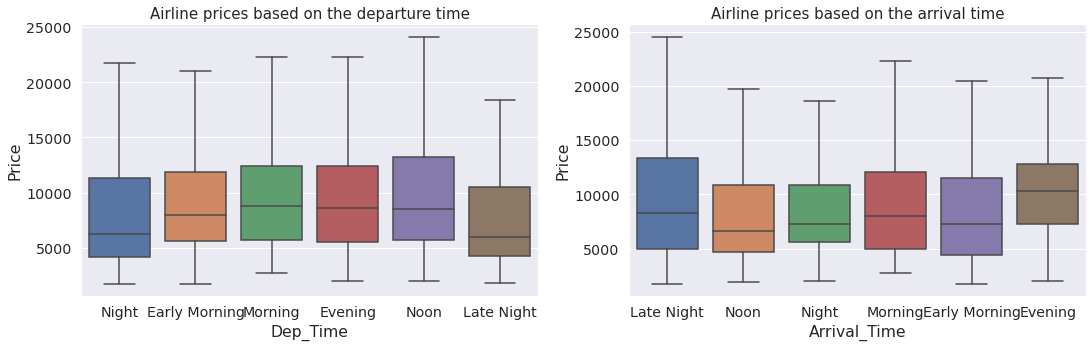

In [50]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=train_df, y="Price", x="Dep_Time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=train_df, y="Price", x="Arrival_Time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>As expected, leaving at night or arriving at night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.</b><br>
    <br></p>


   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Total Stops  </b></p>
</div>


<AxesSubplot:>

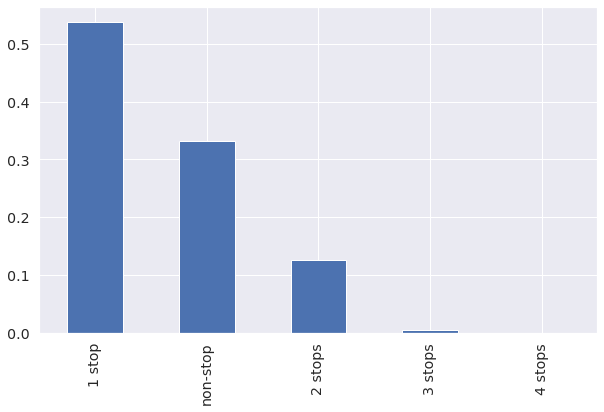

In [51]:
train_df.Total_Stops.value_counts(normalize=True).plot(kind='bar')


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 3 Flights stop are <b>1 stop, non-stop, 2 stops.</b><br>
    <br></p>

<AxesSubplot:xlabel='Total_Stops'>

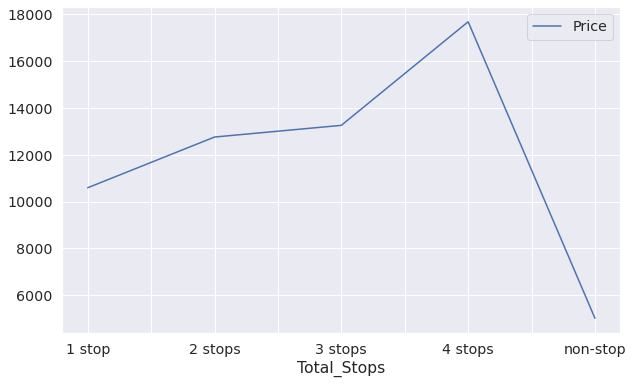

In [52]:
train_df.groupby('Total_Stops')[['Price']].mean().plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

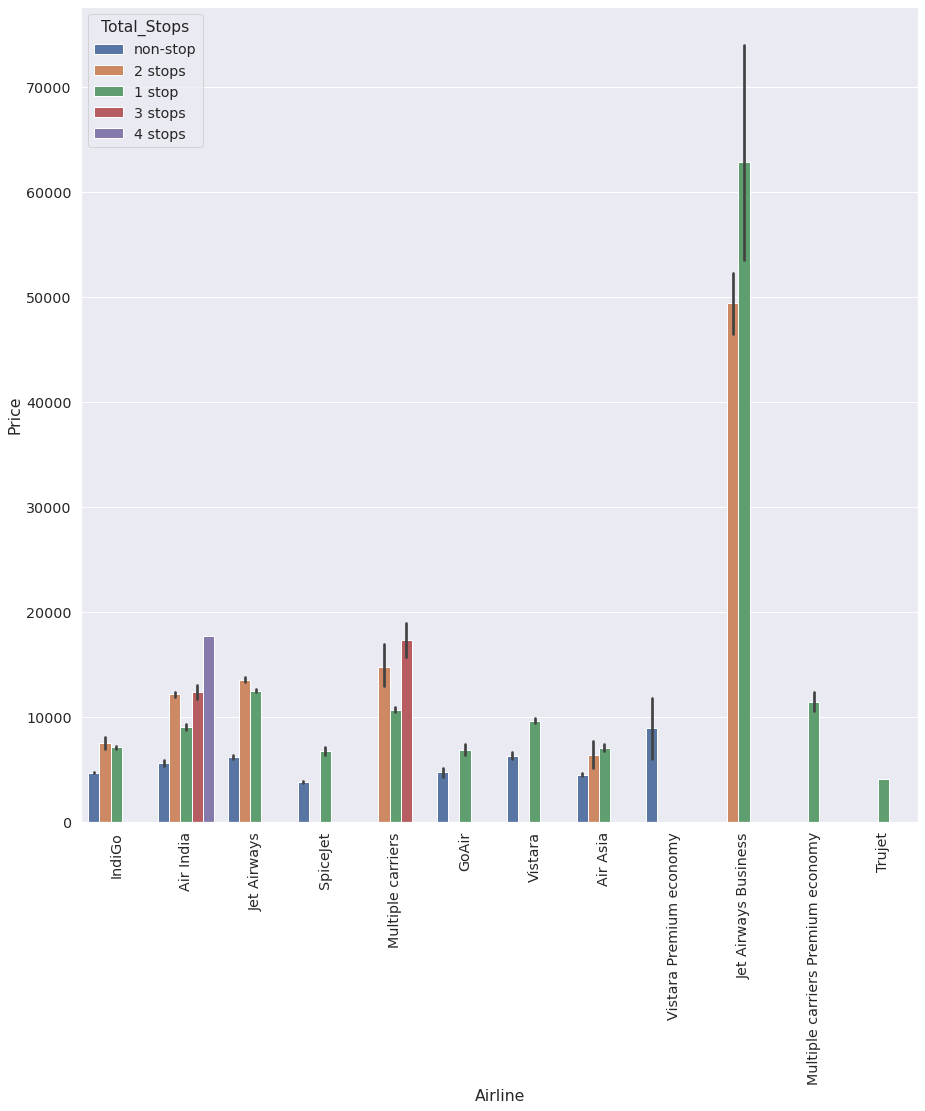

In [53]:
plt.figure(figsize=(15,15))
sns.barplot(y = "Price", x = "Airline",hue="Total_Stops",data = train_df)
plt.xticks(rotation=90)


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>It's clear that the more stops there are the more expensive the flight is except for <b>AirAsia</b> where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.<br>
    <br></p>

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Additional information  </b></p>
</div>


In [54]:
train_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
train_df['Additional_Info']=train_df['Additional_Info'].replace({'No Info':'No info'})

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


<AxesSubplot:>

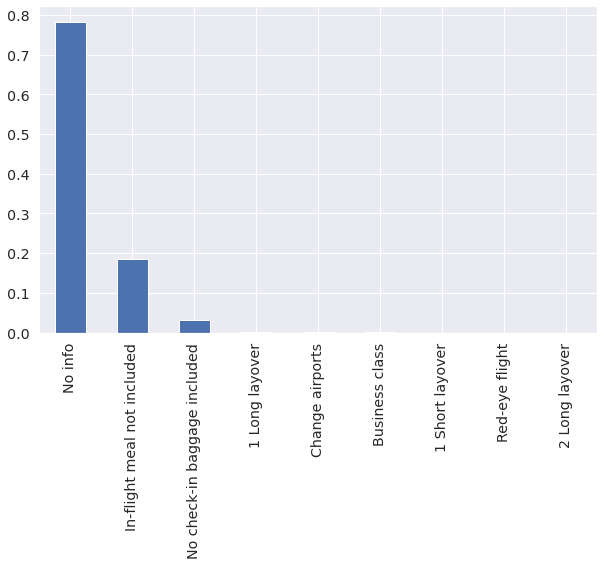

In [56]:
print(train_df.Additional_Info.value_counts())
train_df.Additional_Info.value_counts(normalize=True).plot(kind='bar')


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,top 3 Additional info are<br>
    <b>1.No info.<br>
    2.In-flight meal not included.<br>
    3.No check-in baggage included.<br></b>
    <br></p>

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Red-eye flight'),
  Text(0.0, 0, '1 Long layover'),
  Text(1.0, 0, '1 Short layover'),
  Text(2.0, 0, '2 Long layover'),
  Text(3.0, 0, 'Business class'),
  Text(4.0, 0, 'Change airports'),
  Text(5.0, 0, 'In-flight meal not included'),
  Text(6.0, 0, 'No check-in baggage included'),
  Text(7.0, 0, 'No info'),
  Text(8.0, 0, 'Red-eye flight'),
  Text(9.0, 0, '')])

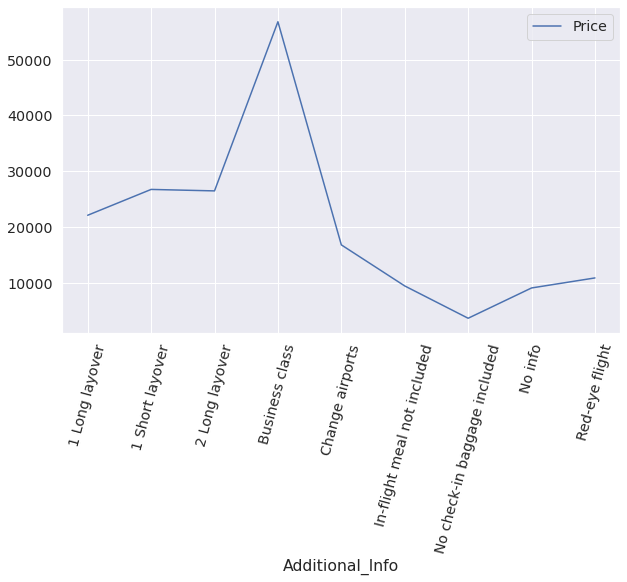

In [57]:
train_df.groupby('Additional_Info')[['Price']].mean().plot(kind='line')
plt.xticks(rotation=75)

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Day  </b></p>
</div>


Thursday     2231
Friday       1781
Wednesday    1579
Monday       1451
Tuesday      1217
Saturday     1168
Sunday       1035
Name: Day, dtype: int64


<AxesSubplot:>

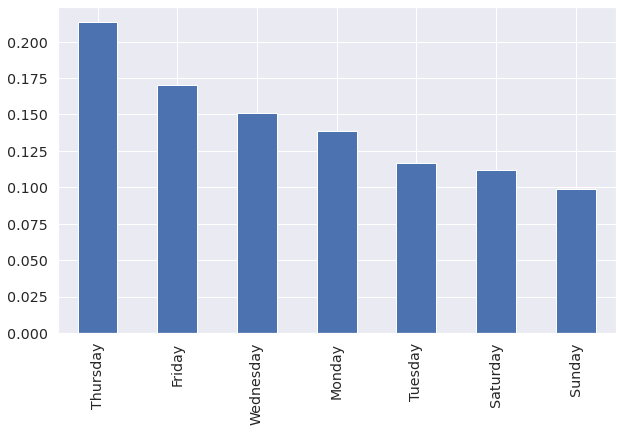

In [58]:
print(train_df.Day.value_counts())
train_df.Day.value_counts(normalize=True).plot(kind='bar')

In [59]:
train_df.groupby('Day')[['Price']].describe()

Price                                                             \
            count         mean          std     min     25%     50%      75%   
Day                                                                            
Friday     1781.0  8516.704099  3702.168850  1965.0  5277.0  8266.0  10919.0   
Monday     1451.0  9625.053756  5260.066567  1759.0  4958.5  8907.0  13502.0   
Saturday   1168.0  8773.347603  3839.354435  1965.0  5192.0  8586.0  11982.0   
Sunday     1035.0  9565.657005  4618.226207  1965.0  5887.5  8855.0  13014.0   
Thursday   2231.0  9747.583147  5666.773578  1759.0  6015.0  8603.0  12557.0   
Tuesday    1217.0  8904.513558  4407.102421  1965.0  4823.0  8033.0  12734.0   
Wednesday  1579.0  7962.445218  3598.058242  1759.0  4823.0  7228.0  10703.0   

                    
               max  
Day                 
Friday     27210.0  
Monday     54826.0  
Saturday   19644.0  
Sunday     46490.0  
Thursday   79512.0  
Tuesday    34608.0  
Wednesday  21219.0

<AxesSubplot:xlabel='Day', ylabel='Price'>

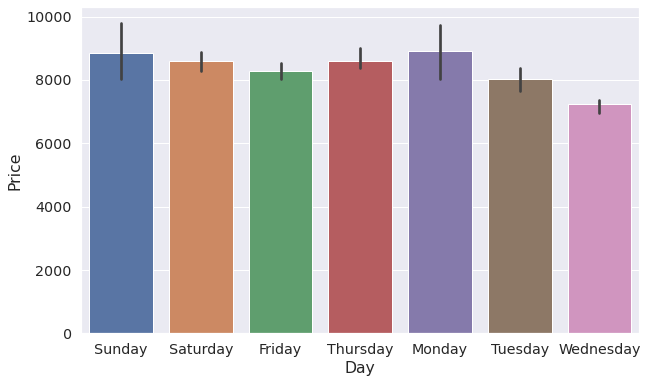

In [60]:
sns.barplot(data=train_df,x='Day',y='Price',estimator=np.median)



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>From the above bar chart we can say that,All week days nearly have the same prices for Air line<br>
    <br></p>

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Month  </b></p>
</div>


6     2465
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Month, dtype: int64


<AxesSubplot:>

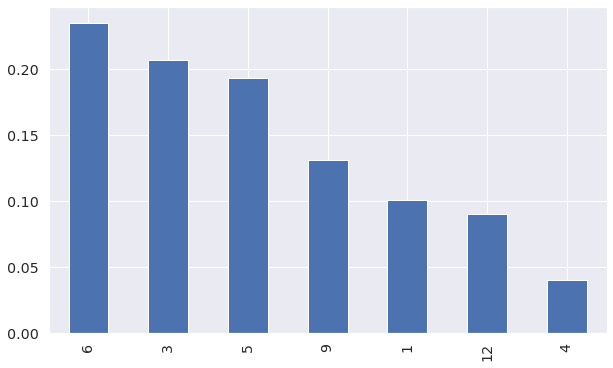

In [61]:
print(train_df.Month.value_counts())
train_df.Month.value_counts(normalize=True).plot(kind='bar')

In [62]:
train_df.groupby('Month')[['Price']].describe()

Price                                                                \
        count          mean          std     min      25%     50%       75%   
Month                                                                         
1      1058.0  10457.094518  7177.094771  1965.0  5515.00  8849.0  12936.75   
3      2169.0   8425.913785  4395.681298  1759.0  5170.00  7486.0  11392.00   
4       424.0   5230.860849  1052.465994  3383.0  4423.00  4924.0   6093.25   
5      2025.0   9253.126914  3912.361395  1965.0  6094.00  9187.0  12898.00   
6      2465.0   9138.287221  4513.329094  1965.0  5054.00  8452.0  12819.00   
9      1375.0   9474.560000  4052.895687  1965.0  6257.50  9314.0  12373.00   
12      946.0   9080.340381  3812.499458  1965.0  5602.75  8949.0  12506.75   

                
           max  
Month           
1      79512.0  
3      54826.0  
4       9564.0  
5      21219.0  
6      52285.0  
9      34608.0  
12     23843.0

<AxesSubplot:xlabel='Month', ylabel='Price'>

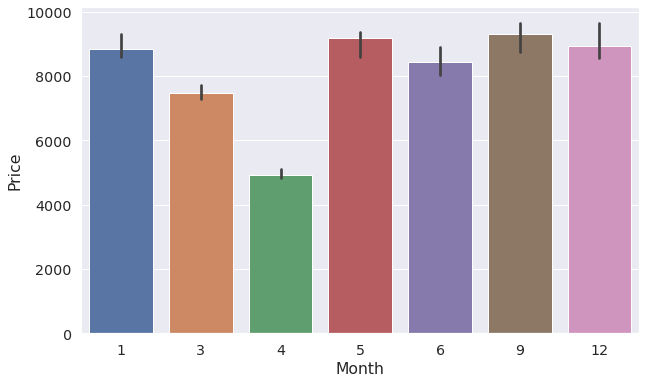

In [63]:
sns.barplot(data=train_df,x='Month',y='Price',estimator=np.median)

# <b>6<span style='color:#0000FF'>|</span> Data Preprocessing</b>

In [64]:
train_df.head()

,Airline,Source,Destination,Month,Day,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,3,Sunday,Night,Late Night,170,non-stop,No info,3897
1,Air India,Kolkata,Banglore,1,Saturday,Early Morning,Noon,445,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,9,Friday,Morning,Late Night,1140,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,12,Thursday,Evening,Night,325,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,1,Thursday,Noon,Night,285,1 stop,No info,13302


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Encoding  </b></p>
</div>. 

In [65]:
def processed(df):
                
    ## label encoding 
    df['Total_Stops']=df['Total_Stops'].map({'non-stop':0 ,'1 stop':1 ,'2 stops':2,'3 stops':3,'4 stops':4,'NaN':0})
    df['Additional_Info']=df['Additional_Info'].map({'No info':0, 'In-flight meal not included':1,
                                                     'No check-in baggage included':2, '1 Short layover':3,
                                                     '1 Long layover':4, 'Change airports':5, 'Business class':6,
                                                     'Red-eye flight':6, '2 Long layover':7})
    ## hot encoding 
    dummies=['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time','Month', 'Day']
    df=pd.get_dummies(df,columns=dummies,drop_first=True)
    
    return df

In [66]:
train_df=processed(train_df)

In [67]:
train_df.head()

,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_Time_Evening,Dep_Time_Late Night,Dep_Time_Morning,Dep_Time_Night,Dep_Time_Noon,Arrival_Time_Evening,Arrival_Time_Late Night,Arrival_Time_Morning,Arrival_Time_Night,Arrival_Time_Noon,Month_3,Month_4,Month_5,Month_6,Month_9,Month_12,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,170,0,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,445,2,0,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1140,2,0,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,325,1,0,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,285,1,0,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# <b>7<span style='color:#0000FF'>|</span> Split Dataset for Training and Testing </b>

In [68]:
features = train_df.drop(columns =['Price'], axis = 1)
target = train_df['Price']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .15, random_state = 44)

In [70]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8892, 45)
Shape of testing feature: (1570, 45)
Shape of training label: (8892,)
Shape of training label: (1570,)


# <b>8<span style='color:#0000FF'>|</span> Standrization </b>

In [71]:
Scaler = StandardScaler()
Scaler.fit(x_train)

StandardScaler()

In [72]:
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [73]:
x_train

array([[-0.3502524 ,  0.2934107 , -0.47020211, ..., -0.5209371 ,
        -0.35896541, -0.41789559],
       [ 0.76917767,  0.2934107 , -0.47020211, ..., -0.5209371 ,
        -0.35896541,  2.39294222],
       [-1.08987585, -1.2120757 , -0.47020211, ..., -0.5209371 ,
        -0.35896541, -0.41789559],
       ...,
       [-0.67008957,  0.2934107 , -0.47020211, ..., -0.5209371 ,
         2.78578376, -0.41789559],
       [-0.27029311,  0.2934107 ,  1.33742313, ..., -0.5209371 ,
        -0.35896541, -0.41789559],
       [ 0.42935069,  0.2934107 , -0.47020211, ..., -0.5209371 ,
         2.78578376, -0.41789559]])

# <b>9 <span style='color:#0000FF'>|</span> Modeling </b>

In [74]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [75]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')
    print('-'*30)

Using model: LR
MSE Score: 2609.361360756387
Training Accuracy: 0.6301621845193468
Testing Accuracy: 0.6856802353061331
------------------------------
Using model: KNNR
MSE Score: 2254.675904412052
Training Accuracy: 0.8140910734662471
Testing Accuracy: 0.7653224834715256
------------------------------
Using model: SVR
MSE Score: 4600.914651133872
Training Accuracy: 0.02327691807568355
Testing Accuracy: 0.022781701703960655
------------------------------
Using model: DT
MSE Score: 2571.5867525703006
Training Accuracy: 0.9890338576089125
Testing Accuracy: 0.6947149085009985
------------------------------
Using model: RF
MSE Score: 1908.446453972957
Training Accuracy: 0.9667092396260917
Testing Accuracy: 0.8318630383833783
------------------------------
Using model: XGBR
MSE Score: 1526.481696886712
Training Accuracy: 0.9348189265719751
Testing Accuracy: 0.8924311714441817
------------------------------


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>The best models' results is <b>XGboost<b></b>
    <br></p>
    

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  XGboost  </b></p>
</div>. 

In [76]:
model = XGBRegressor()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## accurcy 
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')

Training Accuracy: 0.9348189265719751
Testing Accuracy: 0.8924311714441817


In [77]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# <b>10 <span style='color:#0000FF'>|</span> Deployment of model </b>

In [78]:
joblib.dump(model, 'model.h5')

['model.h5']

In [79]:
joblib.dump(Scaler, 'scaler.h5')

['scaler.h5']

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Cross - Validation  </b></p>
</div>. 

In [80]:
c_val = cross_validate(model, x_train, y_train, cv = 20, scoring = 'r2')

In [81]:
c_val

{'fit_time': array([1.31596708, 1.31518221, 1.3381424 , 1.36666298, 1.3462708 ,
        1.31409597, 2.32840204, 1.40005374, 1.27987409, 1.30096388,
        1.29297996, 1.29519343, 1.31069183, 1.3366282 , 1.30662584,
        1.41107821, 1.30986643, 1.35394216, 1.33025193, 1.32493639]),
 'score_time': array([0.00488687, 0.00552416, 0.00541306, 0.00550628, 0.00507712,
        0.00539541, 0.00603175, 0.00519586, 0.00536013, 0.0049355 ,
        0.00508308, 0.00570512, 0.00508475, 0.00517726, 0.00514746,
        0.00575304, 0.00500131, 0.00558615, 0.00510645, 0.00493908]),
 'test_score': array([0.78582231, 0.87282888, 0.87563422, 0.76251628, 0.87657639,
        0.82037576, 0.89401001, 0.85845622, 0.80571303, 0.85565041,
        0.87877713, 0.88727111, 0.83594939, 0.8000988 , 0.84888773,
        0.78011484, 0.8828721 , 0.72315682, 0.87676834, 0.83214771])}

In [82]:
c_val['test_score'].mean()

0.8376813733360752

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Hyperparameters tuning  </b></p>
</div>. 

In [83]:
from sklearn.model_selection import cross_validate, GridSearchCV

model = XGBRegressor(objective='count:poisson')

param = {'n_estimators' : [500, 700, 1000], 'learning_rate' : [0.1,0.2,0.3],'max_depth' : [5,6,7,8]}

grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [84]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 1000}

In [85]:
grid_search.predict(x_test)
print(f'Training Accuracy: {grid_search.score(x_train, y_train)}')
print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')

Training Accuracy: 0.9529096996146398
Testing Accuracy: 0.8924311714441817


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>The best accuracy for <b>XGboost <b> model is <b> 90 %</b>
    <br></p>
    
    
    